In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('Used Car Sales.xlsx')

In [4]:
df.head()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType
0,13500,23,46986,90,1,0,2000,3,1165,1
1,13750,23,72937,90,1,0,2000,3,1165,1
2,13950,24,41711,90,1,0,2000,3,1165,1
3,14950,26,48000,90,0,0,2000,3,1165,1
4,13750,30,38500,90,0,0,2000,3,1170,1


In [5]:
df.FuelType.value_counts()

2    1264
1     155
0      17
Name: FuelType, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Price      1436 non-null   int64
 1   Age        1436 non-null   int64
 2   KM         1436 non-null   int64
 3   HP         1436 non-null   int64
 4   MetColor   1436 non-null   int64
 5   Automatic  1436 non-null   int64
 6   CC         1436 non-null   int64
 7   Doors      1436 non-null   int64
 8   Weight     1436 non-null   int64
 9   FuelType   1436 non-null   int64
dtypes: int64(10)
memory usage: 112.3 KB


In [7]:
df.shape

(1436, 10)

In [8]:
df.isnull().sum()

Price        0
Age          0
KM           0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
FuelType     0
dtype: int64

In [9]:
y = df.Price
X = df[['Age','KM','HP','CC','Weight']]

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
reg = LinearRegression()

In [15]:
regmodel = reg.fit(X,y)

In [17]:
regmodel.score(X,y)

0.8650265008279256

In [18]:
pd.DataFrame(X.columns, regmodel.coef_)

,0
-122.126893,Age
-0.016816,KM
32.466179,HP
-1.626389,CC
22.348944,Weight


In [19]:
regmodel.intercept_

-5999.535382813516

In [20]:
price_pred = regmodel.predict(X)

In [21]:
reg_residual = y-price_pred

<Axes: ylabel='Price'>

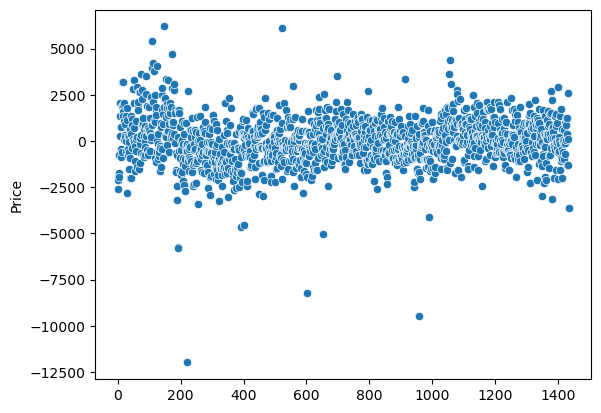

In [23]:
sns.scatterplot(reg_residual)

<Figure size 1000x700 with 0 Axes>

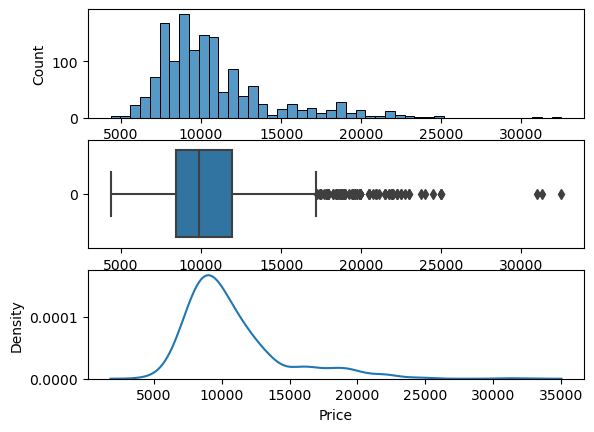

In [25]:
plt.figure(figsize=(10,7))
fig,ax = plt.subplots(3,1)
sns.histplot(y,ax=ax[0])
sns.boxplot(y,ax=ax[1],orient='h')
sns.kdeplot(y,ax=ax[2])
plt.show()

<Figure size 1000x700 with 0 Axes>

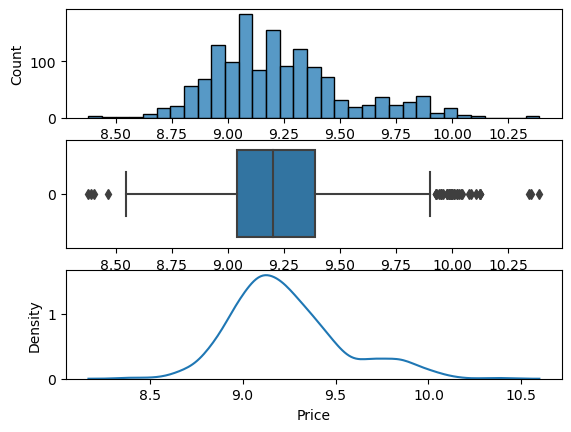

In [27]:
# Lograthimic Transformation transformed to Normal Distribution
plt.figure(figsize=(10,7))
fig,ax = plt.subplots(3,1)
sns.histplot(np.log(y),ax=ax[0])
sns.boxplot(np.log(y),ax=ax[1],orient='h')
sns.kdeplot(np.log(y),ax=ax[2])
plt.show()

In [28]:
regmodel2 = reg.fit(X,np.log(y)) # With Logarthmic Transformation

In [29]:
regmodel2.score(X,np.log(y)) # R Square is less compared to previous model

0.8462891539740582

In [31]:
# Diagnostic Metric for all regression model is Root Mean Square Error.
# RMSE has no fixed range comparitive metric and lower the value the better 
# Model that has the lowest RMSE is the best fit model.

In [32]:
np.sqrt(np.mean(reg_residual**2)) # Mean Squared Error KMSE

1332.0370327969345

In [35]:
np.sum(reg_residual**2) # Sum Squared Error - SSE

2547927335.0821743

In [36]:
np.mean(np.abs(reg_residual)) # Mean Absolute Error - MAE

969.370454573877

In [37]:
# R Square and RMSE must be compared for identifying best fit model
# High R Square & LOW RMSE is best fit model

In [39]:
regmodel2_predict = regmodel2.predict(X)

In [ ]:
reg_residual2=y-regmodel

In [41]:
regmodel2_predict = np.exp(regmodel2_predict)

In [43]:
reg_residuals2 = y-regmodel2_predict

In [45]:
np.sqrt(np.mean(reg_residuals2**2))

1194.6452942679007